#25 Team DIGLETT

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#IMPORT and READ

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random
import numpy as np

lyrics = pd.read_json('./datasets/eurovision-lyrics-2022.json')
eurovision = pd.read_csv('./datasets/eurovision.csv')
general = pd.read_csv('./datasets/general_lyrics.csv')
# jury = pd.read_csv('./datasets/jury.csv')
points = pd.read_csv('./datasets/point_diff.csv')
features = pd.read_csv('./datasets/spotify_audio_features.csv')
vote = pd.read_csv('./datasets/voteToFrom.csv')

-----------

#INFOS

In [164]:
#First Eurovision

year = eurovision['year'].min()

print("-First Eurovision Contest organization was at", year, ".")

-First Eurovision Contest organization was at 1956 .


In [165]:
#Who was the first winner

winners = eurovision[eurovision['winner'] == True]

firstWinner = winners[winners['year'] == year].artist.item()
country = winners[winners['year'] == year].artist_country.item()

print("-The First Winner of Eurovision is ", firstWinner," from ", country,".")

-The First Winner of Eurovision is  Lys Assia  from  Switzerland .


------------------------

#COUNTRIES

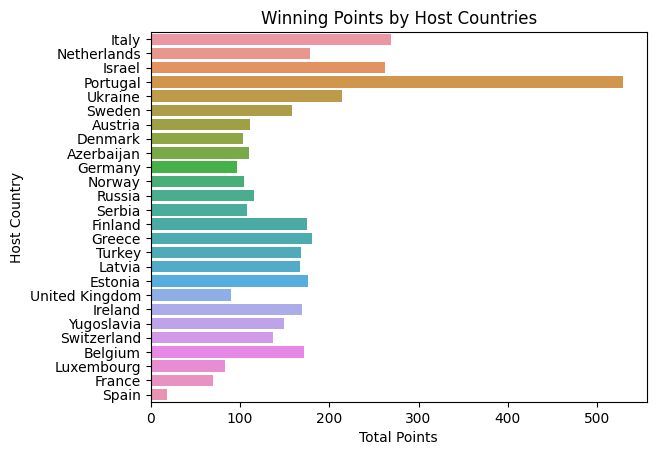

In [166]:
#winning points by host countries

winner = eurovision.loc[eurovision['winner'] == True]

sb.barplot(data=winner, y=winner['host_country'], x=winner['total_points'], errorbar = None)

plt.title("Winning Points by Host Countries")
plt.xlabel("Total Points")
plt.ylabel("Host Country")

plt.show()

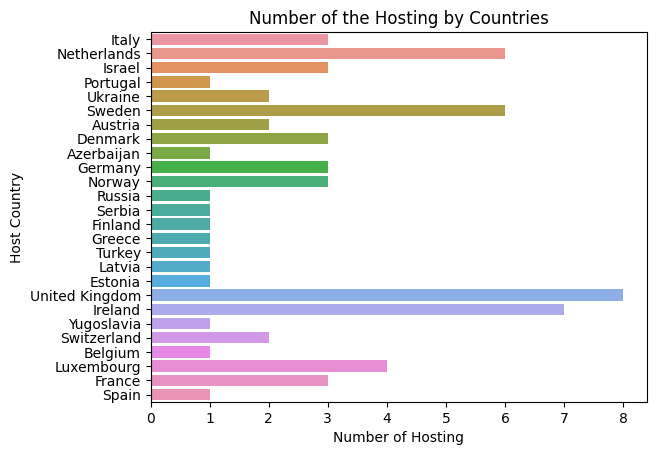

In [167]:
#number of the hosting by countries

host = eurovision.drop_duplicates(subset=['year', 'host_country'])
sb.countplot(y='host_country', data= host)

plt.title("Number of the Hosting by Countries")
plt.ylabel("Host Country")
plt.xlabel("Number of Hosting")

plt.show()

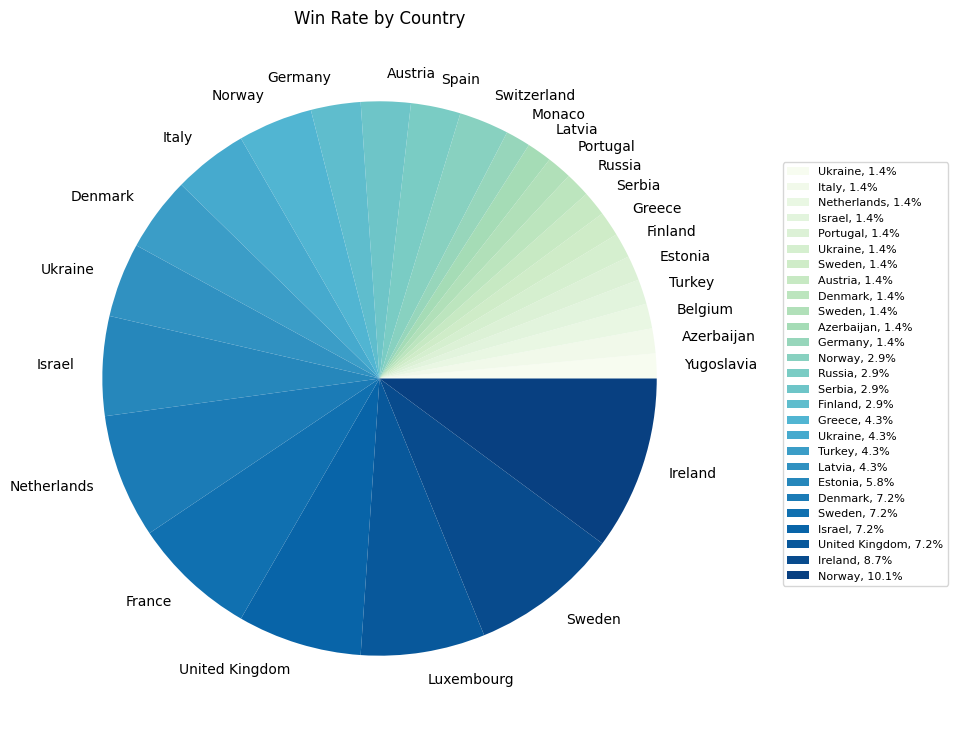

In [168]:
#win rate by country

winners = eurovision[eurovision['winner'] == True]
winners1 = winners[winners['section'] == 'grand-final']
winners2 = winners[winners['section'] == 'final']
winners = [winners1, winners2]
winners = pd.concat(winners)

fig1, ax1 = plt.subplots(figsize=(9, 9))
labels = ["%s" % i for i in winners['artist_country']]

winners.groupby(['artist_country']).size().sort_values(ascending=True).plot(kind = "pie", cmap='GnBu')

total = sum(winners.groupby(['artist_country']).size())
plt.title("Win Rate by Country")
plt.legend(
    bbox_to_anchor = (1.15, 0.5), loc='center right', fontsize=10, 
    bbox_transform=plt.gcf().transFigure,
    labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, winners.groupby(['artist_country']).size().sort_values(ascending=True))],
    prop={'size': 8},
)
plt.show()

------------

#TURKEY

-Turkey has won the contest  1  time(s).


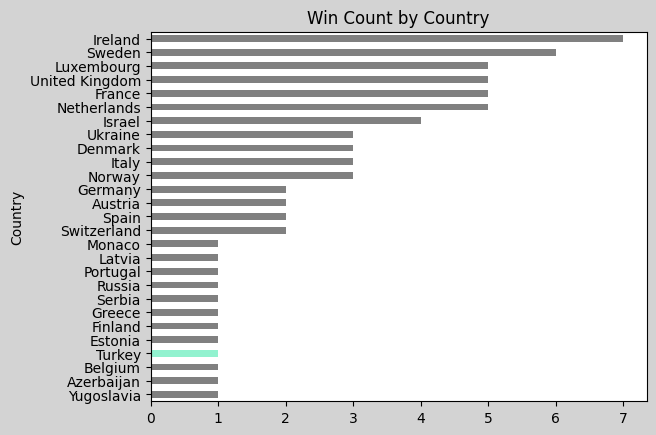

In [169]:
#how many times Turkey won the contest

turkey = winners[winners.artist_country == "Turkey"]

data = winners.groupby(['artist_country']).size().sort_values(ascending=True)

print("-Turkey has won the contest ",len(turkey)," time(s).")

fig, ax = plt.subplots(facecolor='lightgrey')
ax = data.plot(kind='barh', color = "grey", legend=False)

pos = data.index.get_loc('Turkey')
ax.patches[pos].set_facecolor('#92F2CF')

plt.title("Win Count by Country")
plt.ylabel("Country")
plt.show()

In [174]:
#winner of Turkey

artist = turkey.artist.item()
song = turkey.song.item()
year = turkey.year.item()

print("-The winner of Turkey is ", artist," with the song ", song," in ", year,".")

-The winner of Turkey is  Sertab Erener  with the song  Everyway That I Can  in  2003 .


----------------------

#POINTS

In [171]:
#find the max margin between winner and runner-up

df = points.copy()
df2 = df['Margin'].replace('Not announced', "0").replace('No runner-up', "0")
df3 = df2.astype(int) 

print("-Biggest margin in contest is ", df3.max(), ".")


-Biggest margin in contest is  169 .


--------------------------

#JURY

----------

#RYTHEM